In [ ]:
from IPython.display import display, HTML


In [ ]:
# Add CSS styling to wrap text and format table for PDF export
style = """
<style>
.table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
    font-size: 14px;
    color: #333; /* Darker text color for readability */
}
.table th, .table td {
    border: 1px solid black;
    padding: 4px; /* Reduced padding for compact layout */
    text-align: center;
    word-wrap: break-word;
    max-width: 200px; /* Adjust to your preferred max width */
}
.table th {
    background-color: #4CAF50; /* Darker green for better contrast */
    color: white; /* White text for headers */
    font-weight: bold;
}
.table tbody tr:nth-child(odd) {
    background-color: #f9f9f9; /* Alternating row color for readability */
}
.table tbody tr:nth-child(even) {
    background-color: #e8e8e8; /* Alternating row color for readability */
}
.table tbody tr:hover {
    background-color: #d1e7dd; /* Highlight row on hover */
}
</style>
"""


# Apéndice 2: Aireadores y Parámetros de Eficiencia en Haciendas Camaroneras

En esta sección incorporaremos el análisis del primer factor de eficiencia para distintos modelos de aireadores: su eficiencia energética.

### 1. Eficiencia Energética de los Aireadores

Con base en las especificaciones de los motores, obtenidas de los catálogos de venta de los proveedores, se determinó la potencia de cada aireador, expresada inicialmente en HP. Esta potencia fue convertida a kilovatios (kW) para facilitar el cálculo de costos energéticos.

Partiendo de una eficiencia estándar de los motores del 90% (0.9), y considerando que los aireadores operan en promedio 11 horas diarias en las haciendas camaroneras, se calcularon los costos anuales de energía eléctrica. Este cálculo se realizó utilizando el precio promedio del kWh en Ecuador, proporcionando una base económica sólida para evaluar el impacto energético de cada modelo.

#### 1.2. Costo Total de Propiedad

El costo total de propiedad (TCO, por sus siglas en inglés) para un aireador se obtuvo al sumar los siguientes componentes:

1. **Costos iniciales**: Incluyen el precio FOB (Free on Board) y los aranceles aplicados.
2. **Costos energéticos anuales**: Calculados a partir de la eficiencia energética, las horas de operación diarias y el precio del kWh.

Estos elementos permiten estimar el costo integral de operar cada aireador a lo largo de su vida útil, proporcionando una comparación detallada entre modelos.

#### 1.3. Vida Útil y Frecuencia de Reemplazo

Adicionalmente, se recopiló información reportada por las haciendas camaroneras sobre la durabilidad de los modelos de aireadores. Los datos indican una marcada diferencia entre modelos de gama baja y gama alta:

- **Modelos de gama alta**: Vida útil de hasta 6 años, reduciendo la necesidad de reemplazos frecuentes.
- **Modelos de gama baja**: Vida útil de aproximadamente 2 años, lo que implica gastos recurrentes por importación y aranceles, a pesar de su menor costo inicial.

Estas diferencias en durabilidad tienen un impacto directo sobre los costos operativos a largo plazo, favoreciendo la inversión en modelos más duraderos.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [34]:
# Crear el diccionario con datos de la tabla
# Los valores están organizados como claves del diccionario

aireadores_datos = {
    "modelo": [
        "b-105", "b-209", "b-309", "b-401", "b-403", "b-501", "b-503", "b-601", "b-603", "b-701", "b-703",
        "csc-816", "csc-812", "csc-808",
        "yc-0.30", "yc-0.75", "yc-0.75_380", "yc-0.75_4", "yc-1.5", "yc-1.5_380", "yc-1.5_6", "yc-2.2", "yc-2.2_12", "yc-3.0", "yc-3.0_16",
        "yl-3", "yl-2.2", "yl-1.5", "yl-1.1", "yl-0.9", "yl-1.5-cooling", "yls-1.5",
        "f750dp-50", "f750dp-100", "f750dp-150",
        "f1000dp-50", "f1000dp-100", "f1000dp-150",
        "f1500tp-50", "f1500tp-100", "f1500tp-150",
        "hs-a120", "hs-a120s", "hs-a120ss", "hs-a240", "h-260", "h-286", "h-310",
        "pw11-aq", "pw21", "pw23", "pw333",
        "ka501-50", "ka501-100", "ka501-150", "ka501-200", "ka751-50", "ka751-100", "ka751-200",
        "ka752-50", "ka752-100", "ka752-150", "ka101-50", "ka101-100", "ka101-150",
        "ka102-50", "ka102-100", "ka202-50", "ka202-200", "ka303-50",
        "pa-111", "pa-112", "pa-113", "pa-308",
        "saa-111", "saa-112", "saa-308"
    ],
    "potencia_hp": [
        1, 2, 3, 0.75, 0.75, 1, 1, 1.5, 1.5, 3, 3,
        4, 3.5, 3,
        0.5, 1, 1, 1, 2, 2, 3, 3, 3.5, 4, 4,
        4, 3, 2, 1.5, 1.25, 2, 2,
        0.75, 0.75, 0.75,
        1, 1, 1,
        1.5, 1.5, 1.5,
        1, 1, 1, 2, 2, 2, 2,
        1, 2, 2, 3,
        0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75,
        0.75, 0.75, 0.75, 1, 1, 1,
        1, 1, 2, 2, 3,
        1, 2, 3, 3,
        1, 2, 3
    ],
}

# Crear DataFrame
aireadores_df = pd.DataFrame(aireadores_datos)


### 2. Cálculo del Costo Anual de Energía para Cada Aireador

Para estimar el costo anual de energía asociado al funcionamiento de cada aireador, se usaron las siguientes fórmulas:

$\text{Potencia (kW)} = \text{Potencia (HP)} \times 0.746$

$\text{Consumo horario (kWh)} = \frac{\text{Potencia (kW)}}{\text{Eficiencia}}$

$\text{Consumo anual (kWh)} = \text{Consumo horario (kWh)} \times 11 \times 365$

$\text{Costo anual (USD)} = \text{Consumo anual (kWh)} \times \text{Costo por kWh (USD)}$

Estos cálculos fueron aplicados a cada modelo de aireador en el conjunto de datos, permitiendo determinar su impacto económico anual en términos de consumo energético:


In [55]:
# Calcular el consumo kWh y el costo anual de energía
costo_kwh = 0.06  # Costo promedio del kWh en USD para Ecuador
horas_diarias = 11  # Horas de operación diaria
eficiencia = 0.9  # Eficiencia estándar del motor

def calcular_consumo_y_costo(hp):
    potencia_kw = hp * 0.746  # Convertir HP a kW
    consumo_kwh = potencia_kw / eficiencia  # Consumo horario en kWh
    total_kwh = consumo_kwh * horas_diarias * 365  # Consumo anual en kWh
    costo_anual = total_kwh * costo_kwh  # Costo anual de energía
    return consumo_kwh, total_kwh, costo_anual

# Aplicar el cálculo a cada fila
aireadores_df[["consumo_kwh", "total_kwh", "costo_anual"]] = aireadores_df["potencia_hp"].apply(
    lambda hp: pd.Series(calcular_consumo_y_costo(hp))
)

# Redondear los valores a 2 decimales
aireadores_df = aireadores_df.round(2)

muestra = aireadores_df[["modelo", "potencia_hp", "total_kwh", "costo_anual"]].head(10)

# Hago la tabla
tabla_aireadores = style + muestra.to_html(
    index=False, justify="center", classes="table table-striped table-bordered"
)

display(HTML(tabla_aireadores))


modelo,potencia_hp,total_kwh,costo_anual
csc-816,4.0,13311.96,798.72
yl-3,4.0,13311.96,798.72
yc-3.0_16,4.0,13311.96,798.72
yc-3.0,4.0,13311.96,798.72
csc-812,3.5,11647.96,698.88
yc-2.2_12,3.5,11647.96,698.88
yl-2.2,3.0,9983.97,599.04
yc-1.5_6,3.0,9983.97,599.04
csc-808,3.0,9983.97,599.04
yc-2.2,3.0,9983.97,599.04


In [36]:
# Rankeamos los modelos por costo anual más caros a barato
aireadores_df = aireadores_df.sort_values(by="costo_anual", ascending=False)

# Mostrar el DataFrame
aireadores_df

# Guardar el DataFrame en un archivo CSV
aireadores_df.to_csv("/mnt/fast/Data/aquaculture/beraqua/reports/aireadores_consumo_energia.csv", index=False)


In [37]:
df_datos_aeradores = pd.read_csv("/mnt/fast/Data/aquaculture/beraqua/processed/prospectos_importadores/concat/merged/imp_aireadores_2017-2023.csv")

# Modelos seleccionados de interés
modelos_interes = [
        "b-105", "b-209", "b-309", "b-401", "b-403", "b-501", "b-503", "b-601", "b-603", "b-701", "b-703",
        "csc-816", "csc-812", "csc-808",
        "yc-0.30", "yc-0.75", "yc-0.75_380", "yc-0.75_4", "yc-1.5", "yc-1.5_380", "yc-1.5_6", "yc-2.2", "yc-2.2_12", "yc-3.0", "yc-3.0_16",
        "yl-3", "yl-2.2", "yl-1.5", "yl-1.1", "yl-0.9", "yl-1.5-cooling", "yls-1.5",
        "f750dp-50", "f750dp-100", "f750dp-150",
        "f1000dp-50", "f1000dp-100", "f1000dp-150",
        "f1500tp-50", "f1500tp-100", "f1500tp-150",
        "hs-a120", "hs-a120s", "hs-a120ss", "hs-a240", "h-260", "h-286", "h-310",
        "pw11-aq", "pw21", "pw23", "pw333",
        "ka501-50", "ka501-100", "ka501-150", "ka501-200", "ka751-50", "ka751-100", "ka751-200",
        "ka752-50", "ka752-100", "ka752-150", "ka101-50", "ka101-100", "ka101-150",
        "ka102-50", "ka102-100", "ka202-50", "ka202-200", "ka303-50",
        "pa-111", "pa-112", "pa-113", "pa-308",
        "saa-111", "saa-112", "saa-308"
]

# Filtro el conjunto de datos para incluir solo los modelos de interés
df_modelos_interes = df_datos_aeradores[df_datos_aeradores['modelo_mercaderia'].isin(modelos_interes)]

# Calculo los valores unitarios para 'us$_flete', 'us$_seguro', 'us$_cif' y 'advalorem'
df_modelos_interes = df_modelos_interes.copy()
df_modelos_interes['flete_unit'] = df_modelos_interes['us$_flete'] / df_modelos_interes['cantidad']
df_modelos_interes['seguro_unit'] = df_modelos_interes['us$_seguro'] / df_modelos_interes['cantidad']
df_modelos_interes['cif_unit'] = df_modelos_interes['us$_cif'] / df_modelos_interes['cantidad']
df_modelos_interes['advalorem_unit'] = df_modelos_interes['advalorem'] / df_modelos_interes['cantidad']

# Convertir la columna de fechas a formato datetime, si no lo está
df_modelos_interes['fecha'] = pd.to_datetime(df_modelos_interes['fecha'], errors='coerce')

# Función para ajustar el costo por inflación según la fecha exacta de importación
def ajustar_por_inflacion(costo, fecha_importacion, año_actual, tasa=0.03):
    diferencia_años = año_actual - fecha_importacion.year
    return costo * ((1 + tasa) ** diferencia_años)

# Ajusto por inflación 'us$_fob_unit', 'us$_flete_unit', 'us$_seguro_unit', 'us$_cif_unit' y 'advalorem_unit'
año_actual = 2024

# Ajustar por inflación usando la columna de fecha
df_modelos_interes['2024_fob_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['us$_fob_unit'], fila['fecha'], año_actual), axis=1
)
df_modelos_interes['2024_flete_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['flete_unit'], fila['fecha'], año_actual), axis=1
)
df_modelos_interes['2024_seguro_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['seguro_unit'], fila['fecha'], año_actual), axis=1
)
df_modelos_interes['2024_cif_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['cif_unit'], fila['fecha'], año_actual), axis=1
)
df_modelos_interes['2024_advalorem_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['advalorem_unit'], fila['fecha'], año_actual), axis=1
)


# Calculo los costos promedio ponderados para cada modelo
costo_promedio_ponderado = df_modelos_interes.groupby('modelo_mercaderia')[
    [
        '2024_fob_unit', '2024_flete_unit', '2024_seguro_unit',
        '2024_cif_unit', '2024_advalorem_unit'
    ]
].mean()

costo_promedio_ponderado = costo_promedio_ponderado.round({
    '2024_fob_unit': 2,
    '2024_flete_unit': 2,
    '2024_seguro_unit': 2,
    '2024_cif_unit': 2,
    '2024_advalorem_unit': 2
})

# Muestro los costos promedio ponderados para cada modelo
print("Costos promedio ponderados para cada modelo después de ajustar por inflación:\n")
print(costo_promedio_ponderado)

# Guardar el DataFrame en un archivo CSV
costo_promedio_ponderado.to_csv("/mnt/fast/Data/aquaculture/beraqua/reports/aireadores_cif_ponderados.csv")


Costos promedio ponderados para cada modelo después de ajustar por inflación:

                   2024_fob_unit  2024_flete_unit  2024_seguro_unit  \
modelo_mercaderia                                                     
b-209                    1158.61            63.73              7.37   
b-601                     446.05            20.91              3.52   
b-603                     386.32            16.68              2.99   
csc-816                   911.56            32.98              5.33   
ka101-50                 1305.02            16.70              8.58   
ka102-50                 1335.65            18.23              9.02   
ka501-50                  855.95            13.67              5.94   
pa-112                    667.83            14.30              4.85   
pa-308                   1191.07            87.96              6.15   
yc-1.5                    330.23            40.64              2.38   
yc-2.2                    529.94            42.12              5.02  

### 3. Razonamiento para comparar la tasa de interés máxima al financiar un b-209 vs. un pa-112

Vamos a calcular y comparar los costos totales de propiedad para ambos modelos, considerando que:

**Modelo b-209:**

- **Costo inicial:** $1,158
- **Duración:** 6 años (se cambia 2 veces en 12 años)
- **Costo energético anual:** $400

**Modelo pa-112:**

- **Costo inicial:** $667
- **Duración:** 2 años (se cambia 6 veces en 12 años)
- **Costo energético anual:** $400

Ambos costos se ajustan por una inflación anual del 3%. Ahora analizamos los costos en detalle:

#### 3.1. Cálculo del costo total para el modelo b-209

**Años 0-12:**

- **Costo inicial (año 0):** $1,158

- **Costo de reemplazo (año 6):** $1,158 \times (1 + 0.03)^6 \approx 1,380.49$

- **Costo energético anual (12 años):** $\sum_{i=0}^{11} 400 \times (1 + 0.03)^i \approx 5,713.26$

**Costo total b-209:** $1,158 + 1,380.49 + 5,713.26 = 8,251.75$

#### 3.2. Cálculo del costo total para el modelo pa-112

**Años 0-12:**

- **Costo inicial (año 0):** $667

- **Costos de reemplazo:** Se cambia 5 veces (años 2, 4, 6, 8, 10). Cada reemplazo se ajusta por inflación:

  $667 \times (1 + 0.03)^2 \approx 708.47$

  $667 \times (1 + 0.03)^4 \approx 752.76$

  $667 \times (1 + 0.03)^6 \approx 799.71$

  $667 \times (1 + 0.03)^8 \approx 849.46$

  $667 \times (1 + 0.03)^{10} \approx 902.10$

  **Total Reemplazos:** $708.47 + 752.76 + 799.71 + 849.46 + 902.10 \approx 4,012.50$

- **Costo energético anual (12 años):** $5,713.26$

**Costo total pa-112:**

$667 + 4,012.50 + 5,713.26 = 10,392.76$

#### 3.3. Cálculo de la tasa de interés máxima

Si se financia el b-209 (con un costo inicial de $1,158) para evitar la "sangría de caja" causada por pagar al contado múltiples pa-112, se calcula la tasa de interés máxima anual que se puede pagar:

- **Costo financiado (pa-112):** $10,392.76
- **Costo contado (b-209):** $8,251.75
- **Horizonte:** 12 años

La fórmula para la tasa de interés máxima es:

$(1 + r)^{12} = \frac{\text{Costo financiado}}{\text{Costo contado}}$

Resolviendo para r:

$r = \left( \frac{10,392.76}{8,251.75} \right)^{\frac{1}{12}} - 1 \approx \text{1.94\%}$

- **Costo total b-209:** $8,251.75
- **Costo total pa-112:** $10,392.76
- **Tasa máxima de interés anual para financiar el b-209:** **1.94%**

Esto significa que, al financiar el b-209, siempre que la tasa de interés anual sea **menor o igual a 1.94%**, sería más conveniente optar por financiar este modelo en lugar de comprar al contado múltiples pa-112. Sin embargo, este modelo considera estrictamente costos directamente observables, como aranceles y consumo energético.

Aqui aplicamos el calculo para todos los modelos de la muestra:


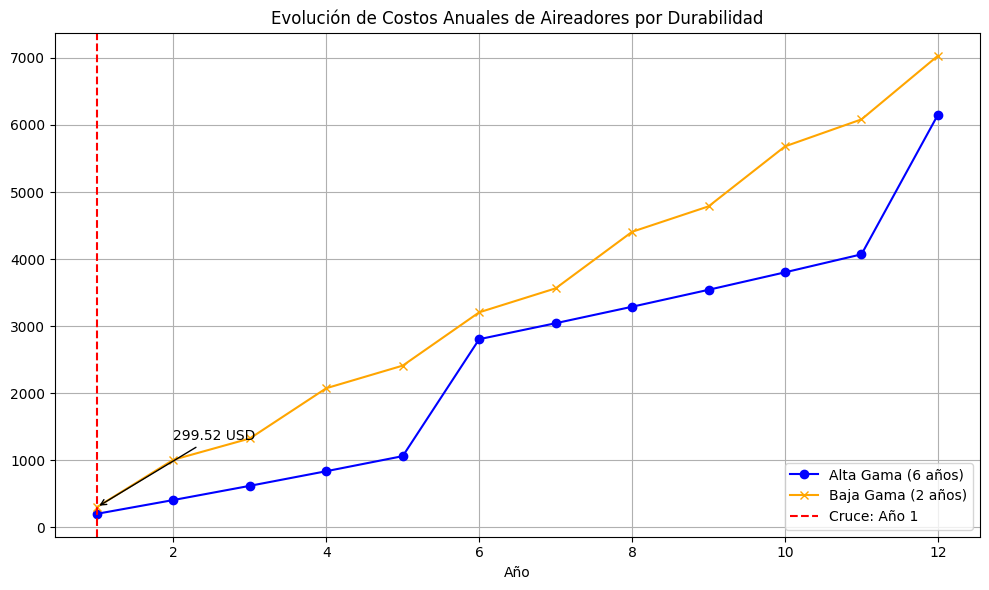

modelo,costo_anual,2024_cif_unit,2024_advalorem_unit,ctp
ka501-50,99.84,875.56,43.78,4320.55
ka101-50,199.68,1330.29,66.52,5697.14
ka102-50,199.68,1362.91,68.15,5764.34
b-603,299.52,405.99,10.80,6951.60
b-601,299.52,470.48,5.46,7369.18
yc-1.5,399.36,373.26,18.97,7976.40
b-209,399.36,1229.71,33.70,8209.76
pa-112,399.36,686.98,45.27,10336.61
pa-308,599.04,1285.17,26.30,11114.83
yc-2.2,599.04,577.08,44.90,12206.45


In [54]:
# Cargar los DataFrames de aireadores y costos promedio ponderados
aireadores_costos_energia = pd.read_csv("/mnt/fast/Data/aquaculture/beraqua/reports/aireadores_consumo_energia.csv")
aireadores_cif_ponderados = pd.read_csv("/mnt/fast/Data/aquaculture/beraqua/reports/aireadores_cif_ponderados.csv")

# modelo_mercaderia en cif = modelo en consumo de energía
aireadores_cif_ponderados = aireadores_cif_ponderados.rename(columns={"modelo_mercaderia": "modelo"})

# Concatenar los DataFrames de aireadores y costos promedio ponderados
aireadores_costos = pd.merge(aireadores_costos_energia, aireadores_cif_ponderados, on="modelo")

# Cálculo del costo total de propiedad considerando inflación
def calcular_costo_total_propiedad(row, inflacion=0.03, horizonte=12):
    costo_inicial = row['2024_fob_unit']
    duracion = 0

    # Determinar duración del aireador basado en el costo inicial
    if costo_inicial > 1000:
        duracion = 6
        reemplazos = 2
    elif costo_inicial > 800:
        duracion = 4
        reemplazos = 3
    else:
        duracion = 2
        reemplazos = 6

    # Costo inicial (sin inflación)
    costos_iniciales = costo_inicial

    # Calcular costos de reemplazo ajustados por inflación
    costos_reemplazo = sum(
        costo_inicial * ((1 + inflacion) ** (duracion * i)) for i in range(1, reemplazos)
    )

    # Calcular costo de energía a lo largo del horizonte (12 años)
    costo_energia_anual = row['costo_anual']
    costo_energia_ajustado = sum(
        costo_energia_anual * ((1 + inflacion) ** i) for i in range(horizonte)
    )

    # Sumar costos iniciales, de reemplazo y energía
    costo_total = costos_iniciales + costos_reemplazo + costo_energia_ajustado

    return costo_total

# Aplicar la función a cada fila del DataFrame
aireadores_costos['ctp'] = aireadores_costos.apply(
    calcular_costo_total_propiedad, axis=1
)

# Redondear los valores a 2 decimales
aireadores_costos = aireadores_costos.round({
    'ctp': 2,
    'costo_anual': 2
})

# Ordenar los resultados por costo total de propiedad
aireadores_costos = aireadores_costos.sort_values(by="ctp", ascending=True)

# Resetear los índices
aireadores_costos = aireadores_costos.reset_index(drop=True)

# Guardar el resultado en un nuevo archivo CSV
aireadores_costos.to_csv(
    "/mnt/fast/Data/aquaculture/beraqua/reports/aireadores_costo_total_propiedad.csv", index=False
)

# Filtrar aireadores que se cambian 2 veces (duración de 6 años)
aireadores_duracion_6 = aireadores_costos[aireadores_costos['2024_fob_unit'] > 1000]

# Filtrar aireadores que se cambian 6 veces (duración de 2 años)
aireadores_duracion_2 = aireadores_costos[aireadores_costos['2024_fob_unit'] <= 800]

# Costo total promedio de propiedad para cada categoría
costo_total_6_anos = aireadores_duracion_6['ctp'].mean()
costo_total_2_anos = aireadores_duracion_2['ctp'].mean()

# Calcular la tasa de interés anual máxima
def calcular_tasa_maxima(costo_contado, costo_financiado, horizonte):
    return (costo_financiado / costo_contado) ** (1 / horizonte) - 1

tasa_maxima = calcular_tasa_maxima(costo_total_6_anos, costo_total_2_anos, horizonte=12)

# Guardar los resultados en un archivo
resultados = {
    "Costo promedio (6 años)": costo_total_6_anos,
    "Costo promedio (2 años)": costo_total_2_anos,
    "Tasa máxima anual": tasa_maxima * 100
}

resultados_df = pd.DataFrame([resultados])
resultados_df.to_csv(
    "/mnt/fast/Data/aquaculture/beraqua/reports/tasa_maxima_interes_anual.csv", index=False
)

aireadores_costos = pd.read_csv("/mnt/fast/Data/aquaculture/beraqua/reports/aireadores_costo_total_propiedad.csv")

# Definir los parámetros para el cálculo
inflacion = 0.03
horizonte = 12

# Función para calcular los costos anuales
def calcular_costos_anuales(costo_inicial, costo_energia_anual, duracion, inflacion, horizonte):
    costos = []
    acumulado = 0
    for year in range(horizonte):
        # Agregar costo de energía anual ajustado por inflación
        acumulado += costo_energia_anual * ((1 + inflacion) ** year)
        
        # Agregar costo de reemplazo ajustado por inflación
        if (year + 1) % duracion == 0:
            acumulado += costo_inicial * ((1 + inflacion) ** year)
        
        costos.append(acumulado)
    return costos

# Filtrar los modelos según el criterio
modelos_6_anos = aireadores_costos[aireadores_costos['2024_fob_unit'] > 1000].iloc[0]
modelos_2_anos = aireadores_costos[aireadores_costos['2024_fob_unit'] <= 800].iloc[0]

# Calcular los costos anuales para cada modelo
costos_6_anos = calcular_costos_anuales(
    modelos_6_anos['2024_fob_unit'],
    modelos_6_anos['costo_anual'],
    6,
    inflacion,
    horizonte
)

costos_2_anos = calcular_costos_anuales(
    modelos_2_anos['2024_fob_unit'],
    modelos_2_anos['costo_anual'],
    2,
    inflacion,
    horizonte
)

# Encontrar el año de intersección
intersection_year = next(
    (i for i in range(horizonte) if costos_2_anos[i] > costos_6_anos[i]),
    None
)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, horizonte + 1), costos_6_anos, label="Alta Gama (6 años)", marker="o", color="blue")
plt.plot(range(1, horizonte + 1), costos_2_anos, label="Baja Gama (2 años)", marker="x", color="orange")

# Añadir intersección si existe
if intersection_year is not None:
    plt.axvline(intersection_year + 1, color="red", linestyle="--", label=f"Cruce: Año {intersection_year + 1}")
    plt.annotate(
        f'{costos_2_anos[intersection_year]:.2f} USD', 
        xy=(intersection_year + 1, costos_2_anos[intersection_year]),
        xytext=(intersection_year + 2, costos_2_anos[intersection_year] + 1000),
        arrowprops=dict(facecolor='black', arrowstyle="->")
    )

plt.title("Evolución de Costos Anuales de Aireadores por Durabilidad")
plt.xlabel("Año")
plt.ylabel("")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seleccionar las columnas deseadas
columnas_deseadas = [
    'modelo',
    'costo_anual',
    '2024_cif_unit',
    '2024_advalorem_unit',
    'ctp'
]

# Crear la tabla HTML estilizada
tabla_html = aireadores_costos[columnas_deseadas].to_html(
    index=False, justify="center", classes="table table-striped table-bordered"
)

# Crear HTML para los resultados estilizados
resultados_html = f"""
<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #f9f9f9; width: 60%; font-family: Arial, sans-serif;">
    <h3 style="text-align: center; color: #4CAF50;">Resultados Destacados</h3>
    <p style="color: #000;"><strong>Costo total de propiedad promedio (Alta Gama):</strong> ${costo_total_6_anos:,.2f}</p>
    <p style="color: #000;"><strong>Costo total de propiedad promedio (Baja Gama):</strong> ${costo_total_2_anos:,.2f}</p>
    <p style="color: #000;"><strong>Tasa de interés anual máxima:</strong> {tasa_maxima * 100:.2f}%</p>
</div>
"""

# Crear un contenedor para la tabla y los resultados
output_html = f"""
<div style="display: grid; grid-template-rows: auto auto; gap: 20px; align-items: start; margin: 20px;">
    <div>{tabla_html}</div>    
    <div>{resultados_html}</div>
</div>
"""

# Renderizar el contenedor completo
display(HTML(output_html))


### 4. Análisis Preliminar

Si, por ejemplo, agregamos otros componentes a la ecuación, como el costo de oportunidad—conocido como el "costo invisible" para los economistas—medido por el diferencial en productividad que un aireador de alta gama proporciona en comparación con uno de baja gama, y sumamos el elevado riesgo de interrupción en la cadena de suministros cuando es necesario realizar un reemplazo, especialmente si este es causado por un fallo no anticipado del equipo, junto con los costos logísticos asociados a la aduana y transporte en casos de compras previstas para aireadores menos durables, encontramos una disparidad aún mayor entre ambos modelos de aireador.

Por ende, una tasa de interés que considere no solo las partidas contables, sino también la propensión al riesgo de los inversionistas de la camaronera y la frontera eficiente de Pareto, tenderá a ser significativamente más alta para equiparar ambos modelos.

Para determinar el verdadero valor de la inversión, utilizaremos datos obtenidos de exportadores, como ingresos totales y cantidades exportadas, así como indicadores clave en la acuicultura, como el SAE del aireador, tiempo de engorde del camarón, toneladas de producto por hectárea y los beneficios de escala en expansiones extensivas frente a intensivas. Esto permitirá identificar el límite donde el aumento del tamaño de la hacienda deja de incrementar la rentabilidad de la operación. De esta manera, será posible analizar el incremento esperado de ingresos derivado de inversiones en eficiencia, como el uso de aireadores de alta gama.
